In [163]:
import os
import json
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import random

In [127]:
def display(img, fig=(20, 20)):
    plt.figure(figsize=fig)
    plt.imshow(img)
    plt.show()

In [4]:
files = []
for r,d,f in os.walk("/home/local/ZOHOCORP/shiva-8700/Downloads/objectdetection/VOCdevkit/VOC2012/JPEGImages/"):
    for i in f:
        if ".jpg" in i:
            files.append("/home/local/ZOHOCORP/shiva-8700/Downloads/objectdetection/VOCdevkit/VOC2012/JPEGImages/" + i)
len(files)

17125

In [5]:
js = []
for r,d,f in os.walk("/home/local/ZOHOCORP/shiva-8700/Downloads/objectdetection/VOCdevkit/VOC2012/Annotations/"):
    for i in f:
        if ".xml" in i:
            js.append("/home/local/ZOHOCORP/shiva-8700/Downloads/objectdetection/VOCdevkit/VOC2012/Annotations/" + i)

In [6]:
len(js)

17125

In [52]:
import xml.etree.ElementTree as ET

In [104]:
dict_new

{'shape': {'width': '486', 'height': '500', 'depth': '3'},
 'objects': {1: {'name': 'person',
   'bbox': {'xmin': '174', 'ymin': '101', 'xmax': '349', 'ymax': '351'},
   'part': {1: {'name': 'head',
     'bbox': {'xmin': '169', 'ymin': '104', 'xmax': '209', 'ymax': '146'}},
    2: {'name': 'hand',
     'bbox': {'xmin': '278', 'ymin': '210', 'xmax': '297', 'ymax': '233'}},
    3: {'name': 'foot',
     'bbox': {'xmin': '273', 'ymin': '333', 'xmax': '297', 'ymax': '354'}},
    4: {'name': 'foot',
     'bbox': {'xmin': '319', 'ymin': '307', 'xmax': '340', 'ymax': '326'}}}}}}

In [110]:
for i in tqdm(range(len(js))):
    fn = js[i].split("/")[-1][:-4]
    
    root = ET.parse(js[i]).getroot()
    dict_new = {}
    dict_new["shape"] = {}
    dict_new["objects"] = {}
    count = 0
    for i in root:
        #print(i.tag)
        for j in i:
            if i.tag == "size":
                dict_new["shape"][j.tag] = j.text
            if i.tag == "object":
                if j.tag == "name":
                    count += 1
                    new_count = 0
                    dict_new["objects"][count] = {}
                    dict_new["objects"][count]["name"] = j.text
                    dict_new["objects"][count]["bbox"] = {}
            #print("\t",j.tag, j.text)
            for k in j:
                if i.tag == "object" and j.tag == "bndbox":
                    if k.tag in ["xmin", "ymin", "xmax", "ymax"]:
                        dict_new["objects"][count]["bbox"][k.tag] = k.text
                if i.tag == "object" and j.tag == "part":

                    if j.tag == "part" and k.tag == "name":
                        new_count += 1
                        if "part" not in dict_new["objects"][count]:
                            dict_new["objects"][count]["part"] = {}
                        dict_new["objects"][count]["part"][new_count] = {}
                        #print("cre")
                        dict_new["objects"][count]["part"][new_count]["name"] = k.text
                        dict_new["objects"][count]["part"][new_count]["bbox"] = {}
                        #print(dict_new["objects"][count]["part"][new_count])
                #print("\t\t",k.tag, k.text)
                for l in k:
                    #print("\t\t\t",l.tag, l.text)
                    if i.tag == "object" and j.tag == "part" and k.tag == "bndbox":
                        if l.tag in ["xmin", "ymin", "xmax", "ymax"]:
                            #print(dict_new["objects"][count]["part"])
                            dict_new["objects"][count]["part"][new_count]["bbox"][l.tag] = l.text
                            #print(l.tag, l.text)
                            
                            
    with open("./pascal_Ann/" + fn + ".json", "w") as f:
        json.dump(dict_new, f)



100%|██████████| 17125/17125 [00:02<00:00, 7153.54it/s]


In [99]:
text = []
for element in root:
    text.append(element.get('D',None))
    for child in element:
        for grandchild in child:
            text.append(grandchild.text)
print(text)

[None, None, None, None, None, None, '174', '101', '349', '351', 'head', '\n\t\t\t\t', 'hand', '\n\t\t\t\t', 'foot', '\n\t\t\t\t', 'foot', '\n\t\t\t\t']


In [19]:
f = open(js[0], "r")
lines = f.readlines()
f.close()

In [112]:
jsonfiles = []
for r, d, f in os.walk("./pascal_Ann/"):
    for i in f:
        jsonfiles.append(os.path.join(os.path.abspath("./pascal_Ann/") ,   i))

In [122]:
paths = {}
for i in tqdm(files):
    for j in jsonfiles:
        #print(i, j)
        if i.split("/")[-1][:-4] == j.split("/")[-1][:-5]:
            paths[i] = j
            break

100%|██████████| 17125/17125 [02:00<00:00, 142.23it/s]


In [123]:
len(paths)

17125

In [124]:
with open("./pascal_paths.json", "w") as f:
    json.dump(paths, f)

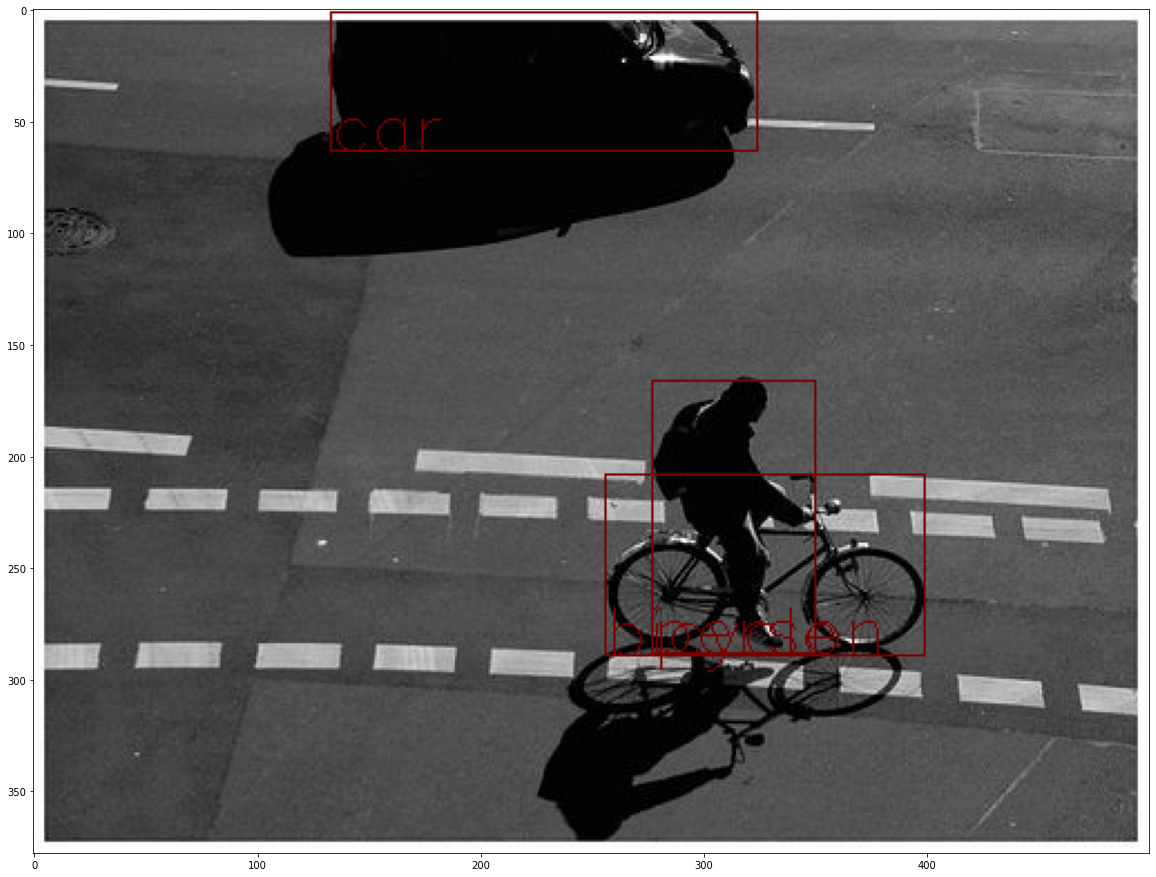

In [168]:
tmp = random.randint(0, len(files)-1)
img = cv2.imread(files[tmp])
with open(paths[files[tmp]], "r") as f:
    data = json.load(f)
for k in data["objects"]:
    name = data["objects"][k]["name"]
    btmp = data["objects"][k]["bbox"]
    bbox = [int(btmp["xmin"]), int(btmp["ymin"]), int(btmp["xmax"]), int(btmp["ymax"])]
    cv2.rectangle(img, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0,0,122), 1)
    cv2.putText(img, name, (bbox[0], bbox[3]), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,122), 1)
    if "part" in data["objects"][k]:
        for l in data["objects"][k]["part"]:
            name = data["objects"][k]["part"][l]["name"]
            btmp = data["objects"][k]["part"][l]["bbox"]
            bbox = [int(btmp["xmin"]), int(btmp["ymin"]), int(btmp["xmax"]), int(btmp["ymax"])]
            cv2.rectangle(img, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (122,0,0), 1)
            cv2.putText(img, name, (bbox[0], bbox[3]), cv2.FONT_HERSHEY_SIMPLEX, 1, (122,0,0), 1)
            
            
display(img[:,:,::-1])

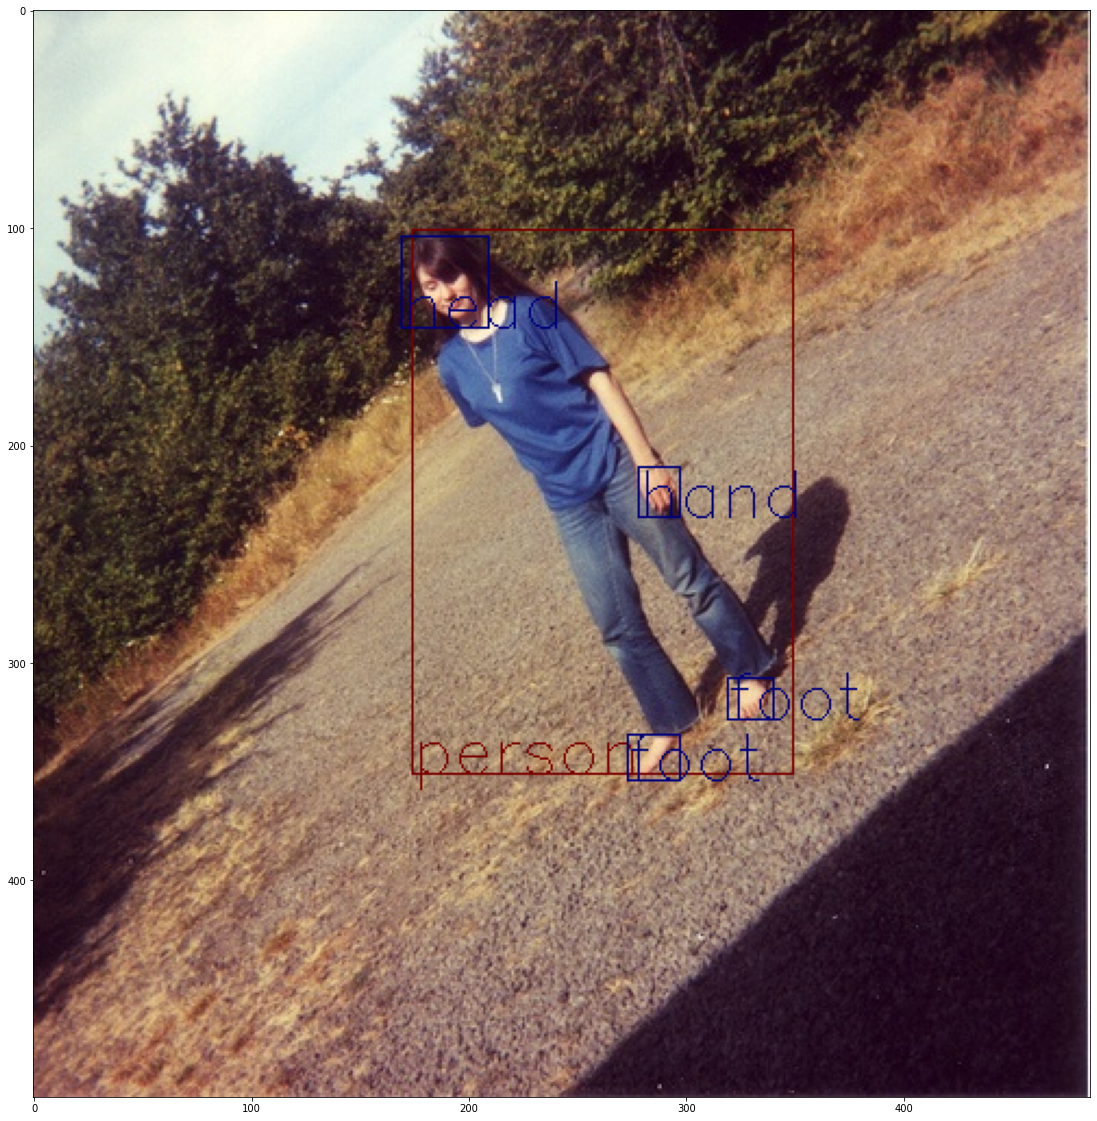

In [208]:
obj = {}
count = 0
for i in files:
    with open(paths[i], "r") as f:
        data = json.load(f)
    for k in data["objects"]:
        if data["objects"][k]["name"] not in obj:
            obj[data["objects"][k]["name"]] = count
            count += 1

In [212]:
data["objects"]['1']

{'name': 'person',
 'bbox': {'xmax': '208', 'xmin': '102', 'ymax': '230', 'ymin': '25'}}

In [210]:
with open("dataset_name.json", "w") as f:
    json.dump(obj, f)

In [230]:
def fromfiles(filename, dataset):
    
    with open(filename, "r") as f:
        data = json.load(f)
    with open(dataset, "r") as f:
        labels = json.load(f)
        
    out = []
    for k in data["objects"]:
        c = labels[data["objects"][k]["name"]]
        tb = data["objects"][k]["bbox"]
        tb = [tb["xmin"], tb["ymin"], tb["xmax"], tb["ymax"]]
        b = [int(tb[0]), int(tb[1]), int(tb[2]), int(tb[3]), int(c)]
        out.append(b)
    return out

def xyxy2xywh():
    pass

def xywh2xyxy():
    pass


    
        

In [ ]:
## data loader 3 stride and 9 anchor boxes
